In [3]:
pwd

'C:\\Users\\Acer\\Documents'

In [212]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv")

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,S,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [9]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [10]:
df.shape

(247, 14)

In [11]:
df.isna().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.shape

(244, 14)

In [14]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [15]:
df["Rain"].value_counts()

Rain
0        133
0.1       18
0.2       11
0.3       10
0.4        8
0.7        6
0.6        6
0.5        5
1.1        3
1.8        3
2          3
1.2        3
3.1        2
2.9        2
1.3        2
3.8        2
0.8        2
1          2
1.4        2
1.9        1
6          1
4.7        1
4.1        1
2.2        1
1.7        1
6.5        1
4.5        1
8.7        1
0.9        1
4          1
Rain       1
5.8        1
8.3        1
4.6        1
10.1       1
7.2        1
16.8       1
2.5        1
13.1       1
4.4        1
Name: count, dtype: int64

In [16]:
df[df['day']=='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [17]:
df = df.drop(124)

In [18]:
df['day'] = df['day'].astype(int)

In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [20]:
df.head(20)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,S,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [21]:
df[df['DC'] == 'S']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
2,3,6,2012,26,82,22,13.1,47.1,2.5,S,0.3,2.7,0.1,not fire


In [22]:
df['DC'] = df['DC'].drop(2)

In [23]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,NaN,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [24]:
df = df.astype({'month':int,'year':int, 'Temperature':int,	'RH':int,	'Ws':int,	'Rain':float,	'FFMC':float, 'DMC':float,	'DC':float,	'ISI':float,	'BUI':float, 'FWI':float})

In [25]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [26]:
dataset = pd.read_csv("Algerian_forest_fires_dataset.csv")

In [27]:
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,S,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [28]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [29]:
122  0

125  1



SyntaxError: invalid syntax (1110100958.py, line 1)

In [30]:
dataset.loc[:121,"Region"] = 0

In [31]:
dataset.loc[125:,"Region"] = 1

In [32]:
df = dataset

In [33]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [34]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,S,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [35]:
df = df.drop([122,123,124,168])

In [36]:
df['Region'].value_counts()

Region
0.0    122
1.0    121
Name: count, dtype: int64

In [38]:
df[df['DC'] == 'S']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
2,3,6,2012,26,82,22,13.1,47.1,2.5,S,0.3,2.7,0.1,not fire,0.0


In [50]:
df = df.astype({'day':int, 'month':int,'year':int, 'Temperature':int,	'RH':int,	'Ws':int,	'Rain':float,	'FFMC':float, 'DMC':float,	'DC':float,	'ISI':float,	'BUI':float, 'FWI':float})

In [51]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region         float64
dtype: object

In [63]:
df['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [54]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [56]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0.0


In [57]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int32
Region         float64
dtype: object

In [61]:
dfs = df.drop(['day','month','year'],axis=1)

In [62]:
dfs.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0.0


<Axes: >

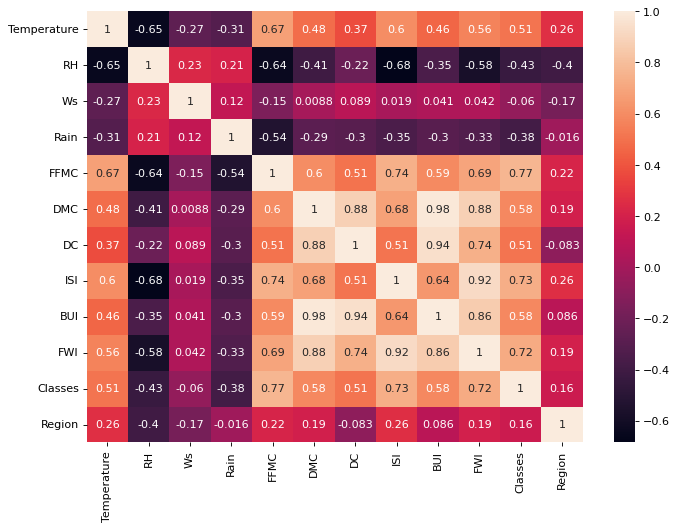

In [74]:
figure(figsize=(10, 7), dpi=80)
sns.heatmap(dfs.corr(),annot=True)

In [81]:
dfs.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.648235,-0.272890,-0.310327,0.671905,0.482622,0.372873,0.601365,0.456514,0.564502,0.512461,0.264686
RH,-0.648235,1.000000,0.234619,0.205536,-0.641438,-0.405367,-0.223186,-0.684895,-0.350369,-0.578972,-0.428580,-0.399452
Ws,-0.272890,0.234619,1.000000,0.123796,-0.149052,0.008833,0.088798,0.019058,0.041425,0.041861,-0.059897,-0.173912
Rain,-0.310327,0.205536,0.123796,1.000000,-0.538034,-0.287803,-0.300433,-0.349607,-0.299885,-0.328065,-0.382424,-0.015955
FFMC,0.671905,-0.641438,-0.149052,-0.538034,1.000000,0.601825,0.505155,0.739314,0.590090,0.690689,0.768799,0.215911
DMC,0.482622,-0.405367,0.008833,-0.287803,0.601825,1.000000,0.875490,0.679065,0.982177,0.875395,0.583760,0.188801
DC,0.372873,-0.223186,0.088798,-0.300433,0.505155,0.875490,1.000000,0.506734,0.941795,0.738626,0.509136,-0.082701
ISI,0.601365,-0.684895,0.019058,-0.349607,0.739314,0.679065,0.506734,1.000000,0.642543,0.922611,0.733864,0.259937
BUI,0.456514,-0.350369,0.041425,-0.299885,0.590090,0.982177,0.941795,0.642543,1.000000,0.857436,0.584745,0.085701
FWI,0.564502,-0.578972,0.041861,-0.328065,0.690689,0.875395,0.738626,0.922611,0.857436,1.000000,0.718040,0.194006


In [134]:
X = dfs.drop('FWI',axis=1)
y = dfs['FWI']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [148]:
def correlated_df(dataset,threshold):
    corr_matrix = dataset.corr()
    col_corr = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [151]:
corr_features = correlated_df(X_train,0.85)

In [153]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [156]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [157]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
25,31,64,18,0.0,86.8,17.8,6.7,1,0.0
8,25,88,13,0.2,52.9,7.9,0.4,0,0.0
162,35,47,18,6.0,80.8,9.8,3.1,1,1.0
82,36,55,18,0.0,89.1,33.5,9.9,1,0.0
115,29,65,19,0.6,68.3,5.5,1.5,0,0.0


In [160]:
scaled_X_train[1]

array([-1.91148331,  1.77332781, -0.90198938, -0.31142797, -1.73724679,
       -0.52116274, -1.01528492, -1.10620261, -0.94809093])

Text(0.5, 1.0, 'After Scaling')

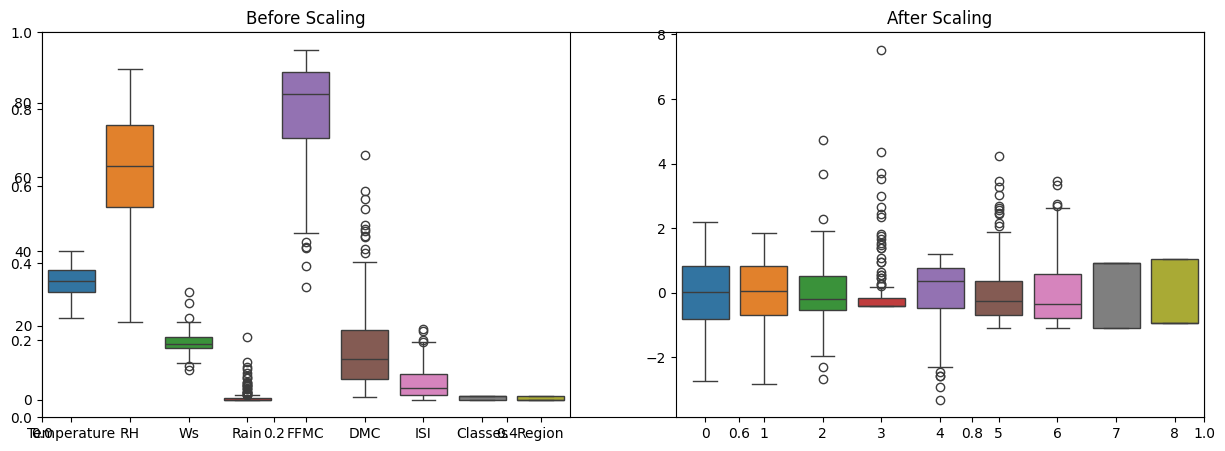

In [182]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data = scaled_X_train)
plt.title("After Scaling")

In [201]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_predict= reg.predict(X_test)

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [202]:
r2_score(y_test,y_predict)

-35.209187514224524

In [203]:
print("MAE:" ,mean_absolute_error(y_test,y_predict))
print("MSE:", mean_squared_error(y_test,y_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_predict)))

MAE: 39.31262931732913
MSE: 2083.181214125972
RMSE: 45.64188004591805


Linear Regression

In [216]:
reg = LinearRegression()
reg.fit(scaled_X_train,y_train)
y_predicted= reg.predict(scaled_X_test)
print(r2_score(y_test,y_predicted))
print("MAE:" ,mean_absolute_error(y_test,y_predicted))
print("MSE:", mean_squared_error(y_test,y_predicted))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_predicted)))

0.9591588662701694
MAE: 1.2188446997225635
MSE: 2.349665606723894
RMSE: 1.5328619007346664


Lasso

In [217]:
lasso = Lasso()
lasso.fit(scaled_X_train,y_train)
y_predicted= lasso.predict(scaled_X_test)
print(r2_score(y_test,y_predicted))
print("MAE:" ,mean_absolute_error(y_test,y_predicted))
print("MSE:", mean_squared_error(y_test,y_predicted))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_predicted)))

0.9194572867418256
MAE: 1.440680454735625
MSE: 4.633770562464309
RMSE: 2.1526194653176183


Ridge: Reduce Overfitting

In [218]:
ridge = Ridge()
ridge.fit(scaled_X_train,y_train)
y_predicted= ridge.predict(scaled_X_test)
print(r2_score(y_test,y_predicted))
print("MAE:" ,mean_absolute_error(y_test,y_predicted))
print("MSE:", mean_squared_error(y_test,y_predicted))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_predicted)))

0.95852865271485
MAE: 1.2154460628564407
MSE: 2.385922952703093
RMSE: 1.5446433092151381


ElasticNet: [Reduce Overfitting + Feature Selection]

In [219]:
elanet = ElasticNet()
elanet.fit(scaled_X_train,y_train)
y_predicted= elanet.predict(scaled_X_test)
print(r2_score(y_test,y_predicted))
print("MAE:" ,mean_absolute_error(y_test,y_predicted))
print("MSE:", mean_squared_error(y_test,y_predicted))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_predicted)))

0.8561617368354706
MAE: 1.9990225008091085
MSE: 8.275280067500644
RMSE: 2.876678652109172


In [220]:
import pickle

In [221]:
pickle.dump(ridge,open('ridger.pkl','wb'))

In [222]:
pickle.dump(scaler,open('scaler.pkl','wb'))